In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
# load the already done pca on the dataset
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

In [23]:
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix,roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score,plot_roc_curve
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [24]:
# plot bar graph showing the distribution of anmomolous to non-anomolous transactions
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes
# got  - 492 fraud trnasactions

0    284315
1       492
Name: Class, dtype: int64

In [26]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Loaded Data from drive
## Sice data is very large we only used 20% of data

In [62]:
# lets reduce our dataset to say 30% as it is a huge dataset with more than 284k+ objects
df= data.sample(frac = 0.1,random_state=1)
df.shape

(28481, 29)

In [63]:
# now lets see the distribution again of normal vs fraud transaction
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]
print(Fraud.shape,Normal.shape)
# you see about 135 fraud cases now

(49, 29) (28432, 29)


In [64]:
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction 

0.0017234102419808666

In [65]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.196039,-0.075208,0.045536,0.380739,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.009041,-0.128619,-0.368565,0.090660,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.206028,-0.305402,-0.774704,-0.123884,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,0.315823,-0.220815,-0.419013,-0.239197,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.105286,-0.160161,-0.430404,-0.076738,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [66]:
#Create independent and Dependent Features
columns = df.columns.tolist()  # all columns
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]   # removing "Class" from our columns list
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 28)
(28481,)


In [67]:
print(X.shape)
print(Y.shape)

(28481, 28)
(28481,)


In [68]:
y = Y
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V25,V26,V27,V28,Amount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.201311,-0.196039,-0.075208,0.045536,0.380739,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,-0.261034,0.080621,0.162427,0.059456,1.98
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.018148,0.121679,0.249050,0.092516,0.89
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.232829,0.814177,0.098797,-0.004273,15.98
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.552170,0.370701,-0.034255,0.041709,0.76


# For generating dataframe with specific input columns

### This would be useful when we train our model for reduced features

In [69]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

# Building Model using Random Forest

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
def run_model(X,y):
        print(X.shape,y.shape)
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        #cm = 1
        #print(y_train.shape,y_pred.shape)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test,y_pred)
        print("Accuracy" , accuracy)
        plot_confusion_matrix(cm,classes)
        print(classification_report(y_test,y_pred))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        return (y_test,y_pred)

# Confusion Matrix Plot

In [72]:
import itertools
classes = np.array(['0','1'])
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

classes = np.array(['0','1'])

    

## Before feature selection 

In [73]:
predicts = {}
test = {}

(28481, 28) (28481,)
Accuracy 0.9992552399191403
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.90      0.60      0.72        15

    accuracy                           1.00      9399
   macro avg       0.95      0.80      0.86      9399
weighted avg       1.00      1.00      1.00      9399

ROC_AUC_score : 0.799947


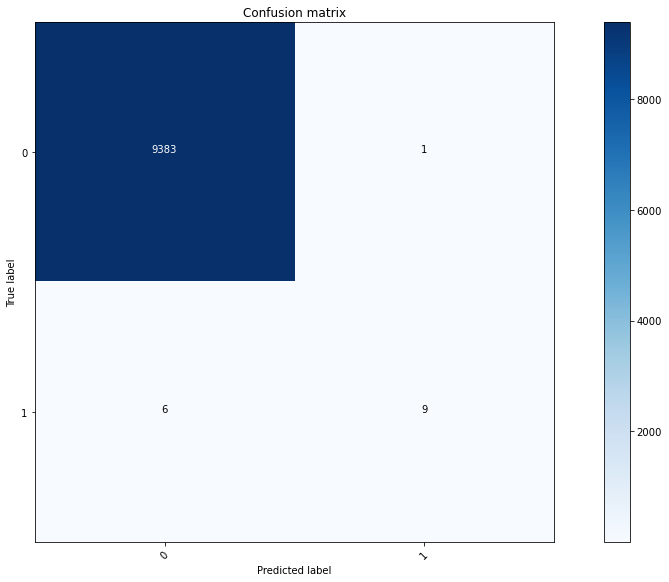

In [74]:
(y_test,y_pred) = run_model(X,y);
predicts["Before feature selection"] = y_pred
test["Before feature selection"] = y_test


In [75]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V25,V26,V27,V28,Amount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.201311,-0.196039,-0.075208,0.045536,0.380739,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,-0.261034,0.080621,0.162427,0.059456,1.98
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.018148,0.121679,0.249050,0.092516,0.89
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.232829,0.814177,0.098797,-0.004273,15.98
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.552170,0.370701,-0.034255,0.041709,0.76


In [76]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.196039,-0.075208,0.045536,0.380739,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.009041,-0.128619,-0.368565,0.090660,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.206028,-0.305402,-0.774704,-0.123884,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,0.315823,-0.220815,-0.419013,-0.239197,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.105286,-0.160161,-0.430404,-0.076738,0.552170,0.370701,-0.034255,0.041709,0.76,0


# Feature Selection Techniques

## 1. Borurta

## Impementing by own without libraries



In [ ]:
X_shadow = X.apply(np.random.permutation)
X_shadow.columns = ['shadow_' + feat for feat in X.columns]
### make X_boruta by appending X_shadow to X
X_boruta = pd.concat([X, X_shadow], axis = 1)

In [ ]:
X_boruta.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### fit a random forest (suggested max_depth between 3 and 7)
forest = RandomForestClassifier(max_depth = 5, random_state = 42)
forest.fit(X_boruta, y)
### store feature importances
feat_imp_X = forest.feature_importances_[:len(df.columns)]
feat_imp_shadow = forest.feature_importances_[len(df.columns):]
### compute hits
hits = feat_imp_X > feat_imp_shadow.max()

In [ ]:
feat_imp_X

In [ ]:
feat_imp_shadow

In [ ]:
hits # after one run -> true means that the corresponding features has surpassed the threshold and is a good feature

In [ ]:
# for 30 iteration
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 30 times
for iter_ in range(30):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest = RandomForestClassifier(max_depth = 5, random_state = 42)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [ ]:
hits

In [ ]:
inds = hits.argsort()[-10:][::-1]
inds

In [ ]:
ser =  X.columns
features = ser[inds]
features

In [ ]:
new_X = select_columns(X,features)
new_X.head()

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Boruta_own"] = y_pred
test["Boruta_own"] = y_pred

# BorutaPy Module - Using inbuilt module

In [60]:
!pip install boruta

In [77]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
###initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 20 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), y)
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V20', 'V26']
features in the blue area: ['V2', 'V5', 'V27']


In [78]:
len(green_area) # got 32 features on 20 iterations, can further select top 5 or 4 on increasing  iterations

15

In [79]:
feat = boruta.support_
feat

array([False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False])

In [80]:
ind = np.where(feat==1)
ind

(array([ 2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 19, 24]),)

In [81]:
ser =  X.columns
features = ser[ind]
features

Index(['V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18', 'V20', 'V26'],
      dtype='object')

In [82]:
new_X = select_columns(X,features)
new_X.head()

,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V20,V26
169876,-0.149759,-0.224877,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,-0.101785,-0.288559,-0.606199,-0.900746,-0.196039,-0.201146
127467,1.329415,0.027273,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.353867,-0.103542,0.128899,-0.964070,-0.009041,0.080621
137900,0.969864,-0.127052,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,-0.649766,0.583787,-0.344094,0.028312,0.206028,0.121679
21513,1.775426,-1.574193,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-0.012238,0.769345,-1.010534,0.357288,0.315823,0.814177
134700,-0.578014,0.879173,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-1.188354,0.576121,1.068353,0.332690,-0.105286,0.370701


In [83]:
boruta.n_features_

15

In [84]:
rank = boruta.ranking_   # best feature has rank 1
rank

array([ 3,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  9,  1,  9,  1,  1,
        1,  7,  1,  3,  6, 11, 11,  1,  2,  4,  6])

In [85]:
inds = rank.argsort()[0:10]
inds

array([13, 16, 15, 24, 11, 10, 17,  8,  9,  6])

In [86]:
ser =  X.columns
features = ser[inds]
features

Index(['V14', 'V17', 'V16', 'V26', 'V12', 'V11', 'V18', 'V9', 'V10', 'V7'], dtype='object')

In [87]:
new_X = select_columns(X,features)
new_X.head()

,V14,V17,V16,V26,V12,V11,V18,V9,V10,V7
169876,-0.101785,-0.606199,-0.288559,-0.201146,0.547347,-0.854023,-0.900746,0.358468,0.070050,0.292491
127467,0.353867,0.128899,-0.103542,0.080621,0.710309,0.096501,-0.964070,-0.704298,-0.600684,0.321552
137900,-0.649766,-0.344094,0.583787,0.121679,0.111898,-0.813214,0.028312,-0.463271,-0.528357,0.706252
21513,-0.012238,-1.010534,0.769345,0.814177,-0.277872,0.905210,0.357288,0.383872,0.334853,0.681867
134700,-1.188354,1.068353,0.576121,0.370701,-0.433200,0.101512,0.332690,-0.084482,-0.696578,0.373692


(28481, 10) (28481,)
Accuracy 0.999361634216406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.85      0.73      0.79        15

    accuracy                           1.00      9399
   macro avg       0.92      0.87      0.89      9399
weighted avg       1.00      1.00      1.00      9399

ROC_AUC_score : 0.866560


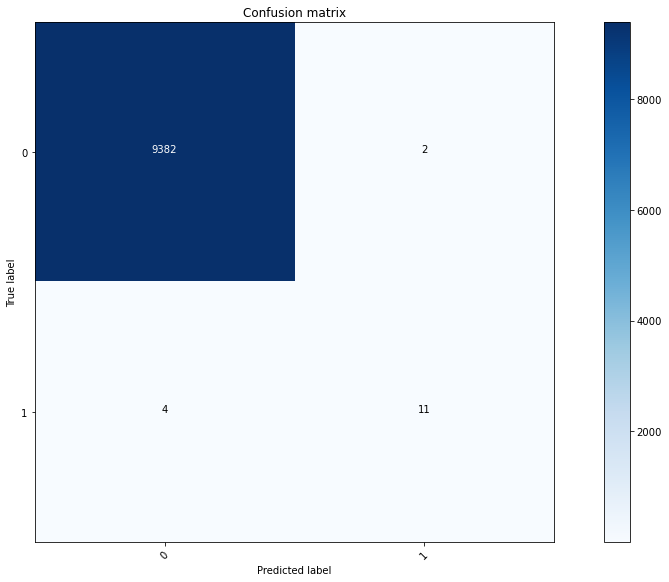

In [88]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Boruta"] = y_pred   # accuracy is 63% for 5 features and 65.5% for 10 features
test["Boruta"] = y_test

# 2. Lasso Regularisation

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'),max_features = 10) 

In [90]:
sel_.fit(X, y)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'),
                max_features=10)

In [91]:
sel_.get_support()

array([False, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
       False])

In [92]:
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['V4', 'V8', 'V10', 'V11', 'V13', 'V14', 'V18', 'V20', 'V26', 'V27'], dtype='object')

In [93]:
new_X = select_columns(X,selected_feat)
new_X.shape

(28481, 10)

(28481, 10) (28481,)
Accuracy 0.9994680285136717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       1.00      0.67      0.80        15

    accuracy                           1.00      9399
   macro avg       1.00      0.83      0.90      9399
weighted avg       1.00      1.00      1.00      9399

ROC_AUC_score : 0.833333


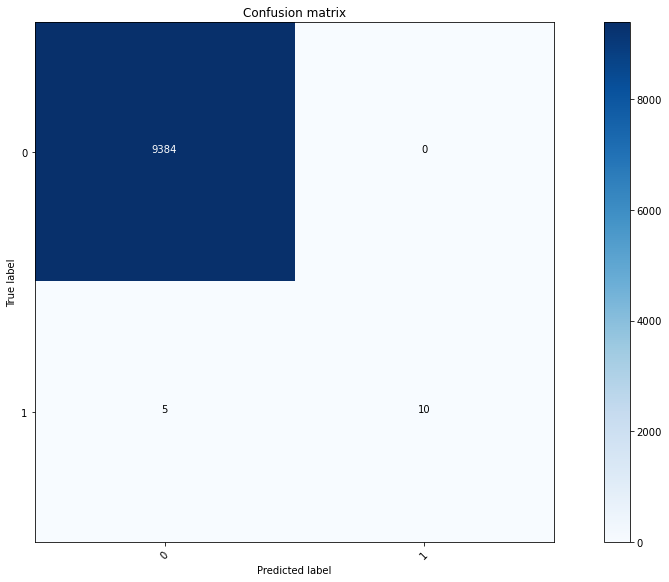

In [94]:
(y_test,y_pred )= run_model(new_X,y);
predicts["Lasso"] = y_pred
test["Lasso"] = y_test

# 3. Recursive Feature Elimination

In [95]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = RandomForestClassifier()
#model = LogisticRegression()

In [96]:
selector = RFE(model,n_features_to_select=10, step=1)
selector.fit(X,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [97]:
selector.support_

array([False, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False])

In [98]:
selector.ranking_

array([ 2,  8,  9,  1, 17,  4,  1,  3,  6,  1,  1,  1, 10,  1, 13,  1,  1,
        5, 14,  1, 12, 15, 19, 16,  1, 11,  7, 18])

In [99]:
selected_feat = X.columns[(selector.get_support())]
selected_feat

Index(['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V20', 'V26'], dtype='object')

In [100]:
selected_feat.shape

(10,)

In [101]:
new_X = select_columns(X,selected_feat)
new_X.head()

,V4,V7,V10,V11,V12,V14,V16,V17,V20,V26
169876,-0.224877,0.292491,0.070050,-0.854023,0.547347,-0.101785,-0.288559,-0.606199,-0.196039,-0.201146
127467,0.027273,0.321552,-0.600684,0.096501,0.710309,0.353867,-0.103542,0.128899,-0.009041,0.080621
137900,-0.127052,0.706252,-0.528357,-0.813214,0.111898,-0.649766,0.583787,-0.344094,0.206028,0.121679
21513,-1.574193,0.681867,0.334853,0.905210,-0.277872,-0.012238,0.769345,-1.010534,0.315823,0.814177
134700,0.879173,0.373692,-0.696578,0.101512,-0.433200,-1.188354,0.576121,1.068353,-0.105286,0.370701


(28481, 10) (28481,)
Accuracy 0.999361634216406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.85      0.73      0.79        15

    accuracy                           1.00      9399
   macro avg       0.92      0.87      0.89      9399
weighted avg       1.00      1.00      1.00      9399

ROC_AUC_score : 0.866560


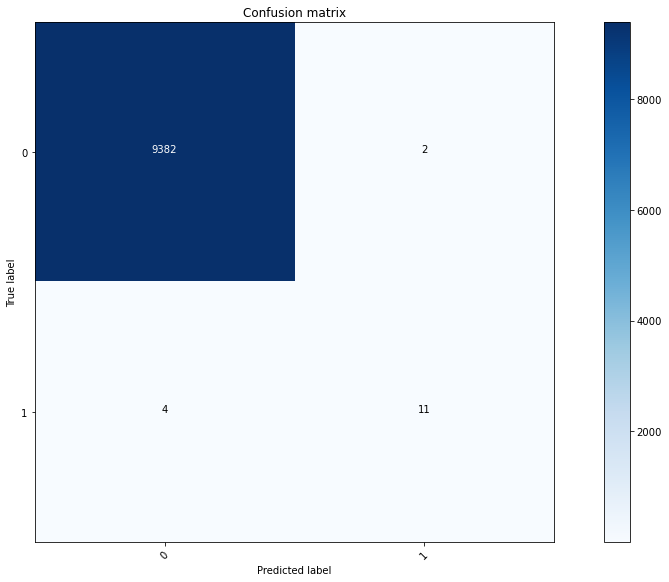

In [102]:
(y_test,y_pred) = run_model(new_X,y);
test["Recursive Feature Elimination"] = y_test
predicts["Recursive Feature Elimination"] = y_pred  # accuracy with 10 feautres - 58.97% with logistic regression
                    # ''       ''     '''       - 62.03% with random forest

# 4. Forward Slection , Backward Selection and Floating Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs1 = sfs(clf,
           k_features=10,   # 10 features to select   
           forward=True,   # forward seelction
           floating=True,  #  floating algorithm
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1.fit(np.array(X), y)

In [ ]:
features = sfs1.k_feature_names_
features

In [ ]:
type(features)
features = np.array(features)
type(features)
features

In [ ]:
fet = X.columns
features = fet[[0, 1, 2, 3, 4, 5, 6, 7, 8, 17]]

In [ ]:
new_X = sfs1.transform(X)
new_X

In [ ]:
new_X = select_columns(X,features)
new_X

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Sequential"] = y_pred 
test["Sequential"] = y_test

# 5.Feature Importances

In [103]:
model = RandomForestClassifier()

In [104]:
model.fit(X, y)

RandomForestClassifier()

In [105]:
importance = model.feature_importances_
importance

array([0.01991036, 0.01294408, 0.0191705 , 0.02265066, 0.01089743,
       0.02262187, 0.02824192, 0.01878211, 0.02796068, 0.07282803,
       0.07117921, 0.1150658 , 0.01531288, 0.14906767, 0.01336081,
       0.05627479, 0.14668255, 0.01974707, 0.01640858, 0.03151357,
       0.01245498, 0.0108742 , 0.00999925, 0.00744223, 0.02035717,
       0.01552913, 0.0185619 , 0.0141606 ])

In [106]:
important_features_dict = {}

In [107]:
for x,i in enumerate(importance):
	important_features_dict[x]=i
#important_features_dict

In [108]:
important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
ind = important_features_list[0:10]   # take best 10 features
features = X.columns[ind]

In [109]:
new_X = select_columns(X,features)
new_X.head()

,V14,V17,V12,V10,V11,V16,V20,V7,V9,V4
169876,-0.101785,-0.606199,0.547347,0.070050,-0.854023,-0.288559,-0.196039,0.292491,0.358468,-0.224877
127467,0.353867,0.128899,0.710309,-0.600684,0.096501,-0.103542,-0.009041,0.321552,-0.704298,0.027273
137900,-0.649766,-0.344094,0.111898,-0.528357,-0.813214,0.583787,0.206028,0.706252,-0.463271,-0.127052
21513,-0.012238,-1.010534,-0.277872,0.334853,0.905210,0.769345,0.315823,0.681867,0.383872,-1.574193
134700,-1.188354,1.068353,-0.433200,-0.696578,0.101512,0.576121,-0.105286,0.373692,-0.084482,0.879173


(28481, 10) (28481,)
Accuracy 0.9991488456218747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.77      0.67      0.71        15

    accuracy                           1.00      9399
   macro avg       0.88      0.83      0.86      9399
weighted avg       1.00      1.00      1.00      9399

ROC_AUC_score : 0.833173


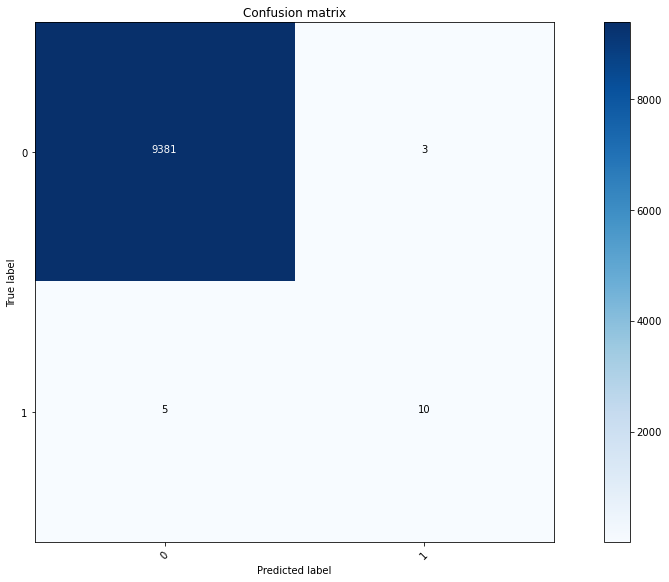

In [110]:
(y_test,y_pred) = run_model(new_X,y);
predicts["Feature Importance - Random Forest"] = y_pred 
test["Feature Importance - Random Forest"] = y_test

# 6. Genetic Algorithm

In [ ]:
pip install sklearn-genetic


In [ ]:
from genetic_selection import GeneticSelectionCV

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
selector = GeneticSelectionCV(estimator,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy",
                                  max_features=10,               # select only 5 important features
                                  n_population=50,
                                  crossover_proba=0.5,
                                  mutation_proba=0.2,
                                  n_generations=40,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
selector = selector.fit(X, y)


In [ ]:
# the best 5 selected features
selected_feat = X.columns[(selector.get_support())]
selected_feat

In [ ]:
new_X = select_columns(X,selected_feat)
new_X.head()

In [ ]:
(y_test,y_pred) = run_model(new_X,y);
test["Genetic Algorithm"] = y_test
predicts["Genetic Algorithm"] = y_pred 

# The aboove accuracy for genetic algorithm is for only 20% data not for 50% , i ran for 50% , it was more than 5 hours but it was still running so i stopped!!

## The accuracy might increase whwn run for more data!!

# ROC-AUC Curves

In [121]:
for key in test.keys():
     print(key)

Before feature selection
Boruta
Lasso
Recursive Feature Elimination
Feature Importance - Random Forest


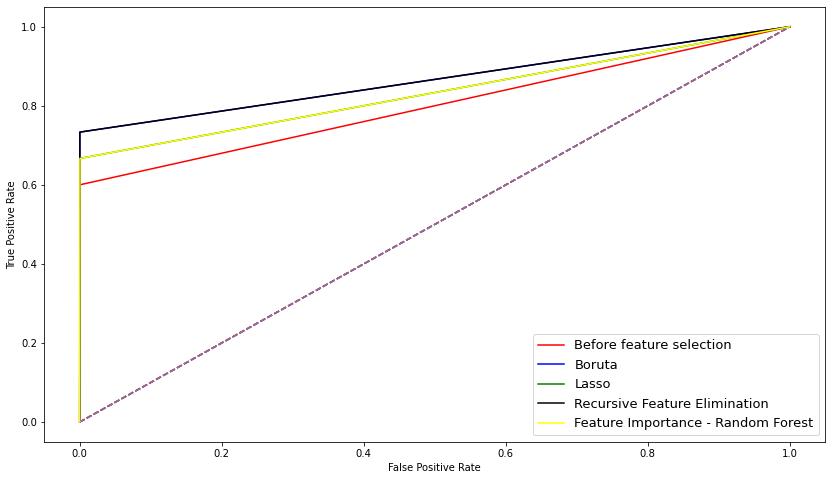

In [127]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"Before feature selection": 'red',
       "Boruta": 'blue',
       "Lasso" : 'green',
      #  "Sequential": 'p-',
        "Feature Importance - Random Forest": 'yellow',
        "Recursive Feature Elimination": 'black',
       # "Genetic Algorithm": 'o-'
        }
for key in test.keys():
    fpr, tpr, thresholds = roc_curve(test[key], predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label = key)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    plt.legend(prop={'size':13}, loc='lower right')
    name = 'ROC curve for '+key
    
#     pyplot.title(name)

# From the curve RFE outperforms others!!
